`63070501061 S.RAKNA`
> 10 points. 1.5 hrs.

# Template Matching

Search for the `t` using `./t_character.png` as template in the text image `./text_image.png`

Use a **bounding box** to mark where `t` were found. Use the **Euclidean norm**.

You may use *OpenCV* to only read and write the image, but not to call the template matching routine.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_image(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error opening image: " + filename)
        exit()
    print("Image size: ", img.shape)
    return img


In [3]:
def euclidean_norm(template, target, x, y, template_width, template_height):
    return (template - target[y:y+template_height, x:x+template_width])**2


In [4]:
# draw bounding box around the template
def bounding_box(target, template_width, template_height, x, y):
    cv2.rectangle(target, (x, y), (x + template_width,
                  y + template_height), (0, 255, 0), 0)


In [5]:
# import the image and template as grayscale
target = read_image("./text_image.png")
template = read_image("./t_character.png")
target_height, target_width = target.shape
template_height, template_width = template.shape

Image size:  (851, 634)
Image size:  (9, 8)


In [6]:
# find the template in the target image
for x in range(0, target_width - template_width):
    for y in range(0, target_height - template_height):
        if np.sum(euclidean_norm(template, target, x, y, template_width, template_height)) == 0:
            bounding_box(target, template_width, template_height, x, y)

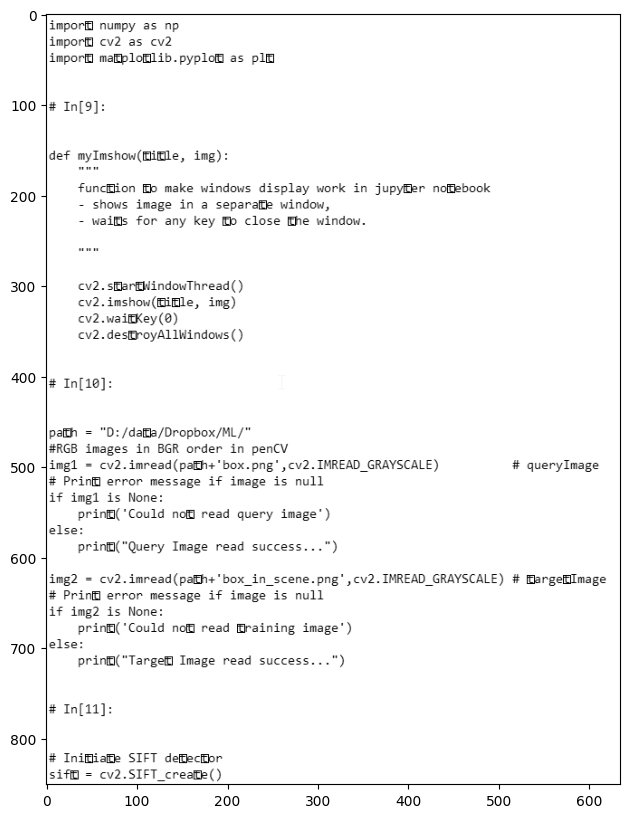

In [7]:
# write the image named "output.png"
cv2.imwrite("output.png", target)

# read output image and display it larger
output = cv2.imread("output.png")
plt.figure(figsize=(10, 10))
plt.imshow(output)
plt.show()
